# Dokumen Analisis

In [1]:
pip install pymupdf4llm nltk networkx matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 74.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


--- 1. Mengekstrak teks dari Nasi_goreng_food_and_wine_pairing_Fried_rice_food_.pdf ---
Berhasil mengekstrak 41741 karakter.

--- 2. Mengekstrak kalimat & Preprocessing ---
Ditemukan 341 kalimat mentah.

Contoh 5 Kalimat Asli:
  1. Jurnal Mahasiswa Pariwisata dan Bisnis EISSN: 2828-3325
Vol 01 No 05, 2022: 1189 -1204EISSN 2579 – 3454
https://dx.doi.org/10.22334/paris.v1i5


_Submitted 20 Mei 2022_
_Accepted 30 Mei 2022_

# **NASI GORENG: FOOD AND WINE PAIRING** **_FRIED RICE: FOOD AND WINE PAIRING_**


**Ni Kadek Jhiestany Nirmala Dewi**
Diploma III Perhotelan, Institut Pariwisata dan Bisnis Internasional


_nirmaladewi150500@gmail.com_


**ABSTRAK**


_Kuliner Indonesia memiliki potensi yang besar untuk dikemangkan menjadi destinasi_
_wisata bagi para wisatawan mancanegara maupun lokal.
  2. Salah satunya adalah nasi goreng,_
_yang merupakan makanan terenak kedua di dunia.
  3. Minum wine saat ini tengah menjadi_
_tren, salah satu wine lokal yang di produksi di Bali yaitu Hatten Wines

,jurnal,mahasiswa,pariwisata,bisnis,eissn,vol,httpsdxdoiorgparisvi,submitted,mei,accepted,...,breakfast,champions,httpswwwtripsavvycomnasigorengricebasedbreakfast,gamal,tharboni,langkah,httpsserupaidmetode,penelitiandeskriptif,httpswwwpergibalicomhatt,enwinebali
jurnal,0,16,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mahasiswa,16,0,16,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pariwisata,17,16,0,17,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bisnis,0,16,17,0,16,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eissn,0,0,16,16,16,32,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
langkah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
httpsserupaidmetode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
penelitiandeskriptif,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
httpswwwpergibalicomhatt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Menampilkan Graph: 1150 node, 3737 edge


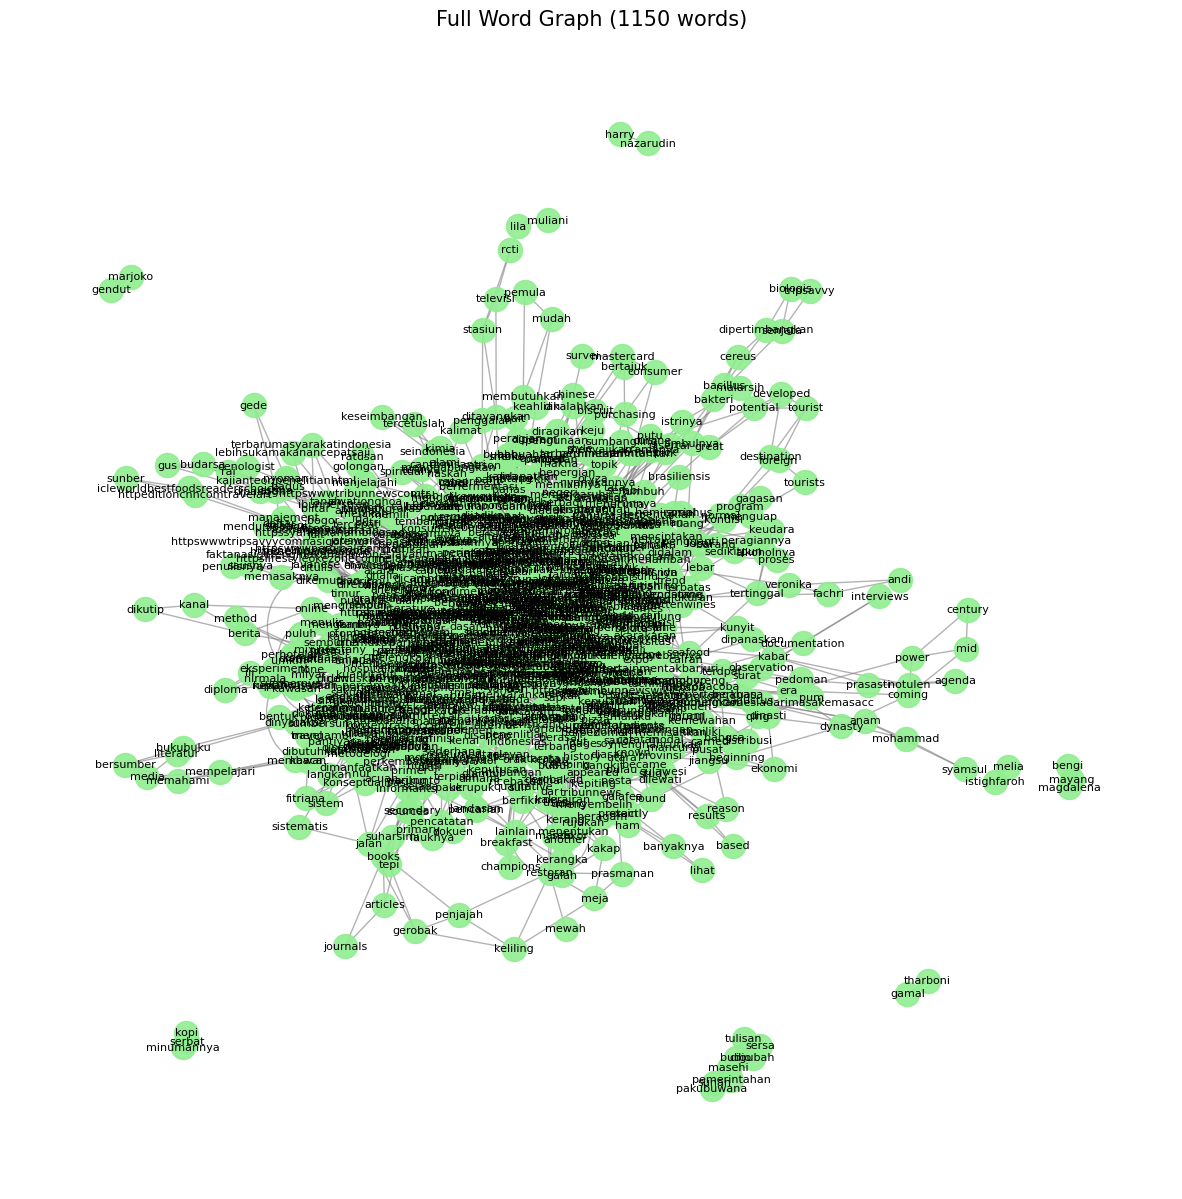

In [3]:
import fitz  # PyMuPDF
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import pymupdf4llm
import pandas as pd # Import pandas for matrix display
import numpy as np # Import numpy

# --- Konfigurasi Awal ---
# Mengunduh resource NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def main():
    pdf_path = "Nasi_goreng_food_and_wine_pairing_Fried_rice_food_.pdf"

    # ==========================================
    # TAHAP 1: Ekstrak Text dari PDF
    # ==========================================
    print(f"--- 1. Mengekstrak teks dari {pdf_path} ---")
    text_content = extract_text_from_pdf(pdf_path)
    print(f"Berhasil mengekstrak {len(text_content)} karakter.")

    # ==========================================
    # TAHAP 2: Ekstrak Kalimat menggunakan NLTK
    # ==========================================
    print("\n--- 2. Mengekstrak kalimat & Preprocessing ---")
    sentences = sent_tokenize(text_content)
    print(f"Ditemukan {len(sentences)} kalimat mentah.")

    # Tambahan: Menampilkan beberapa kalimat asli
    print("\nContoh 5 Kalimat Asli:")
    for i, sentence in enumerate(sentences[:5]):
        print(f"  {i+1}. {sentence.strip()}")

    # Preprocessing (Membersihkan teks untuk hasil graph yang lebih baik)
    # Kita menghapus stopwords (kata umum seperti 'dan', 'yang', 'the')
    clean_sentences_tokens = preprocess_text(sentences)
    print(f"Ditemukan {len(clean_sentences_tokens)} kalimat setelah preprocessing.")

    # Tambahan: Menampilkan beberapa kalimat hasil tokenisasi
    print("\nContoh 5 Kalimat Hasil Tokenisasi (setelah Preprocessing):")
    for i, tokens in enumerate(clean_sentences_tokens[:5]):
        print(f"  {i+1}. {' '.join(tokens)}")

    # ==========================================
    # TAHAP 3: Membuat Graph menggunakan Co-occurrence Matrix
    # ==========================================
    print("\n--- 3. Membangun Word Graph (Co-occurrence) ---")
    # Menggunakan Window Size = 2
    window_size = 2
    G = build_co_occurrence_graph(clean_sentences_tokens, window_size)
    print(f"Graph terbentuk dengan {G.number_of_nodes()} node (kata) dan {G.number_of_edges()} edge (hubungan).")

    print("\nContoh 10 Pasangan Kata Co-occurrence Teratas:")
    # Mengurutkan edge berdasarkan weight (co-occurrence count) secara menurun
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    for i, (u, v, data) in enumerate(sorted_edges[:10]):
        print(f"  {i+1}. ('{u}', '{v}'): {data['weight']} kali")

    # ==========================================
    # TAHAP 4: Analisa PageRank
    # ==========================================
    print("\n--- 4. Menghitung PageRank ---")
    pagerank_scores = nx.pagerank(G, weight='weight')

    # Mengurutkan kata berdasarkan skor tertinggi
    sorted_ranking = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

    print("\nTop 10 Kata Kunci (Berdasarkan PageRank):")
    for i, (word, score) in enumerate(sorted_ranking[:10], 1):
        print(f"{i}. {word}: {score:.4f}")

    # ==========================================
    # MENAMPILKAN CO-OCCURRENCE MATRIX
    # ==========================================
    print("\n--- Full Co-occurrence Matrix ---")
    all_words_for_matrix = list(G.nodes())
    co_occurrence_matrix = pd.DataFrame(0, index=all_words_for_matrix, columns=all_words_for_matrix, dtype=int)

    for u, v, data in G.edges(data=True):
        co_occurrence_matrix.loc[u, v] = data['weight']
        co_occurrence_matrix.loc[v, u] = data['weight'] # Matriks simetris
    display(co_occurrence_matrix)


    # ==========================================
    # VISUALISASI
    # ==========================================
    visualize_graph(G)

# --- Fungsi Pendukung ---

def extract_text_from_pdf(filepath):
    """
    Ekstrak teks mentah dari PDF menggunakan PyMuPDF (fitz).
    Diperbarui untuk menggunakan pymupdf4llm.to_markdown().
    """
    doc = fitz.open(filepath)
    text = pymupdf4llm.to_markdown(doc)
    doc.close()
    return text

def preprocess_text(sentences):
    """
    Membersihkan kalimat: lowercase, hapus tanda baca, hapus stopwords.
    """
    cleaned_tokens_list = []

    # Gabungan stopword Indonesia dan Inggris karena dokumen bilingual
    stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))

    for sentence in sentences:
        # Hapus karakter non-huruf dan ubah ke huruf kecil
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence).lower()
        tokens = word_tokenize(sentence)

        # Filter stopwords dan kata pendek
        filtered_tokens = [w for w in tokens if w not in stop_words and len(w) > 2]

        if filtered_tokens:
            cleaned_tokens_list.append(filtered_tokens)

    return cleaned_tokens_list

def build_co_occurrence_graph(tokens_list, window_size=2):
    """
    Membangun Graph dari co-occurrence matrix.
    Node = Kata, Edge = Kemunculan bersama dalam window size.
    """
    d = defaultdict(int)
    vocab = set()

    for tokens in tokens_list:
        for i in range(len(tokens)):
            token = tokens[i]
            vocab.add(token)

            for j in range(1, window_size + 1):
                if i + j < len(tokens):
                    next_token = tokens[i + j]
                    # Urutkan pasangan agar (A, B) sama dengan (B, A) (Undirected Graph)
                    pair = tuple(sorted((token, next_token)))
                    d[pair] += 1

    # Buat Graph menggunakan NetworkX
    G = nx.Graph()
    for (w1, w2), count in d.items():
        G.add_edge(w1, w2, weight=count)

    return G

def visualize_graph(G, top_nodes_data=None):
    plt.figure(figsize=(15, 15))  # 1. Perbesar ukuran kanvas

    graph_to_draw = G

    # Cek statistik graph
    num_nodes = graph_to_draw.number_of_nodes()
    num_edges = graph_to_draw.number_of_edges()
    print(f"Menampilkan Graph: {num_nodes} node, {num_edges} edge")

    if num_edges == 0:
        print("PERINGATAN: Graph tidak memiliki garis penghubung!")
        return

    # 2. Atur tata letak (Layout)
    # k=0.5 memberikan jarak yang cukup antar node (semakin kecil k, semakin rapat)
    pos = nx.spring_layout(graph_to_draw, k=0.5, iterations=50, seed=42)

    # 3. Tentukan ukuran node berdasarkan jumlah kata
    # Jika kata sedikit (<50), node besar (1000). Jika banyak, node kecil (100-300).
    dynamic_node_size = 300 if num_nodes > 50 else 1000
    dynamic_font_size = 8 if num_nodes > 50 else 10

    # Gambar Nodes
    nx.draw_networkx_nodes(graph_to_draw, pos, node_size=dynamic_node_size, node_color='lightgreen', alpha=0.9)

    # Gambar Edges (Garis)
    # width=1.0 agar garis jelas, alpha=0.6 agar tidak terlalu pekat jika tumpang tindih
    nx.draw_networkx_edges(graph_to_draw, pos, width=1.0, alpha=0.6, edge_color='gray')

    # Gambar Label
    nx.draw_networkx_labels(graph_to_draw, pos, font_size=dynamic_font_size)

    plt.title(f"Full Word Graph ({num_nodes} words)", fontsize=15)
    plt.axis('off')
    plt.show()
if __name__ == "__main__":
    main()